# <b> Lab 2 : Lossy image compression </b>

<i> Compte-rendu par Valentin SÉRÉE et Jérémy SERENA [INFO3]</i>

<b> <u> Question 1 </u> </b>

<i> Récupération de l'image </i>

<b> <u> Question 2 </u> </b>

Nous allons appliquer l'algorithme k-means à une image. Cet algorithme de clustering permet d'analyser le jeu de données qu'est l'image afin de regrouper les donnéees similaires en clusters (ici pouvoir "rassembler" des couleurs proches).

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        kMeansAlgo
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> k = nombre de clusters 
        </br>
        <b>@out :</b> image =  tableau représentant l'image d'origine
        </br>
        <b>@out :</b> imageSeg = tableau représentant l'image clusterisée dont les centroides sont compressés (codewords)
        </br>
        <b>@out :</b> codebook = dictionnaire traduisant les codewords en couleurs (RVB)
    </div>
</div>
<hr><br>
<div>
Cette fonction prend en entrée le nombre de clusters à créer pour l'image (variable globale). L'image va être passée à travers l'algorithme k-means (fonctions Python) puis ressortie sous la forme d'un tableau avec uniquement k valeurs qu'il faudra associer au codebook.</div>



In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

imgPath = 'ex9Data/bird_small.tiff'

def kMeansAlgo(k):
    global imgPath
    image = cv2.imread(imgPath) 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) 
    pixel_vals = image.reshape((-1,3)) 
    pixel_vals = np.float32(pixel_vals)
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
    centers = np.uint8(centers) 
    codebook = {}
    listCenters = list(centers)
    for i in range (len(listCenters)):
        codebook[i] = list(listCenters[i])
    segmented_data = centers[labels.flatten()]
    segmented_image = segmented_data.reshape((image.shape)) 
    imageSeg = codebookImage(segmented_image, codebook)
    return image, imageSeg, codebook

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        codebookImage
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> img = tableau représentant l'image clusterisée (avec les couleurs RVB) 
        </br>
        <b>@in :</b> cb =  codebook = dictionnaire traduisant toutes les couleurs de l'image (RVB) en codewords
        </br>
        <b>@out :</b> imageSeg = tableau représentant l'image clusterisée dont les centroides sont compressés (codewords)
    </div>
</div>
<hr><br>
<div>
Cette fonction prend en entrée l'image clusterisée et transforme ses termes en codewords selon le codebook fourni. L'image en sortie sera donc un tableau à 2 dimensions dont les composants iront de 0 à k-1 (où k est la longueur du codebook, c'est-à-dire le nombre de clusters).</div>



In [2]:
def codebookImage(img, cb):
    image = []
    for i in range (len(img)):
        ligne = []
        for j in range (len(img[0])):
            for k in range (len(cb)):
                if (np.array(cb[k]) == img[i][j]).all():
                    ligne.append(k)
        image.append(np.array(ligne))
        ligne = []
    res = np.array(image)
    return res

<b> <u> Question 3 </u> </b>

Nous allons mettre en oeuvre l'algorithme réalisé ci-dessus pour afficher l'image clusterisée à l'aide de l'image définie en codewords et du codebook. Pour cela, nous allons définir deux fonctions qui permettront de faciliter cet affichage et seront réutilisées plus tard au cours de ce TP.

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        dessinerImg
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> img = tableau représentant l'image clusterisée (avec les couleurs RVB) 
    </div>
</div>
<hr><br>
<div>
Cette fonction permet l'affichage d'une image fournie sous forme d'un tableau RVB.</div>



In [3]:
def dessinerImg(img):
    plt.axis('off')
    plt.imshow(img)

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        remettreEnPlace
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> img = tableau représentant l'image clusterisée dont les centroides sont compressés (codewords) 
        </br>
        <b>@in :</b> cb =  codebook = dictionnaire traduisant toutes les couleurs de l'image (RVB) en codewords
        </br>
        <b>@out :</b> res = tableau représentant l'image clusterisée (avec les couleurs RVB) 
    </div>
</div>
<hr><br>
<div>
Cette fonction prend en entrée l'image clusterisée dont ses termes sont des codewords traduits dans le codebook fourni. L'image en sortie sera donc un tableau à 2 dimensions dont les composants seront les couleurs équivalentes aux codewords.</div>



In [4]:
def remettreEnPlace(img, cb):
    image = []
    for i in range (len(img)):
        ligne = []
        for j in range (len(img[0])):
            ligne.append(np.array(cb[img[i][j]]))
        image.append(np.array(ligne))
        ligne = []
    res = np.array(image)
    return res

<h4> Test des fonctions formées </h4>
On crée dans un premier temps une image clusterisée (on affiche uniquement la première ligne par soucis de commodité, mais on remarque que les valeurs sont bien entre 0 et 9) ainsi que son codebook. Dans un second temps, on essaie d'afficher la photographie remise en forme.

La première ligne de notre image clusterisée est :
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 6 6 6 6 6 6 6 6 6 6 6 6 2 6 6 6 6 6 6 6 6 6 6 6 3 6
 2 2 2 2 2 2 2 2 2 2 2 2 6 2 2 6 2 2 2 4 2 6 7 5 5 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Le codebook associé est :
{0: [25, 27, 24], 1: [247, 239, 203], 2: [220, 178, 110], 3: [172, 151, 131], 4: [230, 202, 166], 5: [67, 60, 58], 6: [193, 139, 66], 7: [130, 96, 55], 8: [140, 171, 208], 9: [121, 110, 112]}
Notre image reconstituée est donc :


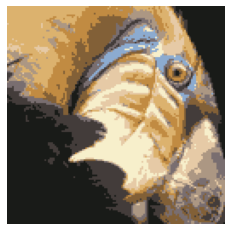

In [5]:
(image, imageCodewords, codebook) = kMeansAlgo(10)
print("La première ligne de notre image clusterisée est :")
print(imageCodewords[0])
print("Le codebook associé est :")
print(codebook)

# On reconstitue ensuite l'image 
image_k_Couleurs = remettreEnPlace(imageCodewords, codebook) 
print("Notre image reconstituée est donc :")
dessinerImg(image_k_Couleurs)

<b> <u> Question 4 </u> </b>

Nous allons calculer consécutivement D(k) (comme la <i>mean square error</i> entre l'image originale et l'image reconstituée) et R(k) après un codage RLE.

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        D
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> k = nombre de clusters
        </br>
        <b>@out :</b> MSE = mean square error
    </div>
</div>
<hr><br>
<div>
Cette fonction calcule simplement la mean square error entre les deux photos. Elle se charge elle-même de clusteriser la photo d'origine et la reconstruire pour faire la comparaison.</div>



In [6]:
from sklearn.metrics import mean_squared_error
import numpy as np

def D(k):
    (img, imgCdw, codebook) = kMeansAlgo(k)
    imgReconst = remettreEnPlace(imgCdw, codebook)
    MSE = np.square(np.subtract(img,imgReconst)).mean()    
    return MSE

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        codingRateRLE
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> k = nombre de clusters
        </br>
        <b>@out :</b> res = tableau représentant l'image dont les pixels sont définis selon des codewords <u> et </u> triés selon RLE
        </br>
        <b>@out :</b> codebook = dictionnaire traduisant toutes les couleurs de l'image (RVB) en codewords
    </div>
</div>
<hr><br>
<div>
Cette fonction clusterise la photographie fournie et la code selon le protocole RLE afin de retourner un tableau représentant l'image et son codebook associé.</div>



In [7]:
def codingRateRLE(k):
    (img, imgData, codebook) = kMeansAlgo(k)
    res, index = [], 0
    for i in range(len(imgData)): # on parcourt toutes les lignes de l'image
        colorActual = imgData[i][0] # on initialise la première couleur
        string_row = "" # chaîne représentant la ligne en cours d'étude
        nombrePixel = 0 # nombre de pixels de cette couleur
        for j in range(len(imgData[0])): # on parcourt une ligne de l'image
            if (imgData[i][j] == colorActual) : # si la couleur du pixel étudié est identique à la précédente
                nombrePixel += 1 # on augmente
            else : # sinon (si la couleur est différente)
                if nombrePixel != 0 : # si le nombre de pixel est non nul
                    string = str(colorActual) + " " + str(nombrePixel) + ";"
                    string_row += string
                nombrePixel = 1
                colorActual = imgData[i][j]
        colorActual = imgData[i][j]
        string = str(colorActual) + " " + str(nombrePixel)
        string_row += string
        res.append(string_row)
        nombrePixel = 0
    return res, codebook

result, cb = codingRateRLE(5)
print(cb)

{0: [237, 222, 187], 1: [210, 165, 98], 2: [31, 32, 30], 3: [151, 143, 146], 4: [120, 94, 68]}


<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        R
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> k = nombre de clusters
        </br>
        <b>@out :</b> resultat = nombre de bit par pixel nécessaire pour coder l'image
    </div>
</div>
<hr><br>
<div>
Cette fonction récupère la représentation de l'image et de son codebook associé, et retourne le nombre théorique de bit par pixel nécessaire à leur encodage.</div>



In [8]:
def R(k):
    global imgPath
    rle, codebook = codingRateRLE(k) # on récupère le tableau contenant l'image et le codebook associé
    res = 0
    image = cv2.imread(imgPath)
    nbColonnes = image.shape[0] # on récupère le nombre de colonnes
    nbLignes = image.shape[1] # on récupère le nombre de lignes
    for i in range(len(rle)):
        raw = rle[i]
        list = raw.split(";") # on récupère chaque terme (codeword + nombre d'apparitions)
        for element in list: # pour chaque duo d'éléments sur une ligne
            couple = element.split(" ") # on récupère de part et d'autre le codeword et le nombre d'apparitions
            res += floor(log(int(couple[0])+1,2)) + floor(log(int(couple[1]),2)) + 2 # on compte la taille de codage
    res += 24*k 
    res = res / (nbLignes*nbColonnes)
    return res

<b> <u> Question 5 </u> </b>

Nous allons tracer l'évolution de la distortion D(k) en fonction du coding rate R(k) pour k variant de 2 à 20.

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        courbeDR
    </p>
</div>
<hr><br>
<div>
Cette fonction permet de tracer l'évolution de la distortion D(k) en fonction du coding rate R(k). Pour cela, elle récupère D(k) et R(k) pour k variant de 2 à 20.</div>



In [9]:
from matplotlib import pyplot
import math 
from math import log, floor

def courbeDR():
    Lx = []
    Ly = []
    for k in range (2, 21):
        Lx.append(R(k))
        Ly.append(D(k))
    pyplot.scatter(Lx, Ly, c = 'red')


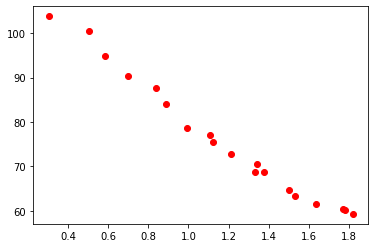

In [10]:
# Tracé de la courbe
courbeDR()

<b> <u> Question 6 </u> </b>

Nous allons implémenter un codec réel permettant d'encoder l'image et son codebook via un fichier, puis de l'afficher à nouveau.

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        reconstructionImageRLE
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> RLE = codage RLE d'une image (résultat de codingRateRLE)
        </br>
        <b>@in :</b>  codebook = dictionnaire traduisant toutes les couleurs de l'image (RVB) en codewords
        </br>
        <b>@out :</b> imageReconst = image reconstruite au format tableau où les couleurs ont remplacé les codewords
    </div>
</div>
<hr><br>
<div>
Cette fonction reconstruit une image passée par le protocole RLE à partir de son codebook.</div>



In [11]:
def reconstructionImageRLE(RLE, codebook):
    image = []
    for i in range (len(RLE)):
        ligne = []
        liste = RLE[i].split(";")
        for j in range(len(liste)):
            liste2 = liste[j].split(" ")
            for k in range (int(liste2[1])):
                ligne.append(np.array(codebook.get(int(liste2[0]))))
        image.append(np.array(ligne))
    imageReconst = np.array(image)
    return imageReconst

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        stockage_image
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> path_cb = destination de stockage du codebook
        </br>
        <b>@in :</b>  path_rle = destination de stockage de l'image
    </div>
</div>
<hr><br>
<div>
Cette fonction récupère l'image et l'encode selon l'algorithme RLE, puis stocke le codebook et l'image dans deux fichiers JSON distincts.</div>



In [12]:
def stockage_image(path_cb, path_rle) :
    k = 11
    (res, codebook) = codingRateRLE(k)
    f = open(path_cb, "w")
    json.dump(codebook, f)
    f.close()
    g = open(path_rle, "w")
    json.dump(res, g)
    g.close()
    print("fait")

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        affichage_image
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> path_cb = destination de stockage du codebook
        </br>
        <b>@in :</b>  path_rle = destination de stockage de l'image
    </div>
</div>
<hr><br>
<div>
Cette fonction récupère une image et un codebook au format JSON et l'affiche.</div>



In [13]:
def affichage_image(path_cb, path_rle) :
    f = open(path_cb, "r")
    codebook = json.load(f)
    f.close()
    g = open(path_rle, "r")
    image = []
    image = json.load(g)
    g.close()
    dessinerImg (reconstructionImage(image, codebook))

In [14]:
## simulation de stockage et de l'affichage
path_cb = "./cb.json" # chemin du codebook
path_rle = "./rle.json" # chemin de l'image
stockage_image(path_cb, path_rle) # stockage de l'image sur l'ordinateur
affichage_image(path_cb, path_rle) # décodage de l'image à partir des fichiers stockés

NameError: name 'json' is not defined